<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.439841,90.245062,97.829156,51.875923,0.747915,307.137898,306.400415,0.737483
1,0.0,1.0,94.857218,33.318459,31.805532,79.305148,-0.078379,249.207979,249.416073,-0.208094
2,0.0,2.0,96.833361,33.268193,90.579821,66.983152,-0.398821,297.265707,297.858299,-0.592592
3,0.0,3.0,66.389045,83.408221,46.930598,24.955139,0.871027,232.554030,231.609091,0.944939
4,0.0,4.0,43.001841,80.686749,77.400702,54.552355,-0.496431,265.145216,265.664120,-0.518904
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.435549,25.970324,22.107276,87.754254,0.180170,188.447573,188.485868,-0.038294
119996,999.0,116.0,68.284647,56.941501,68.724004,50.361597,0.865719,255.177468,254.262755,0.914713
119997,999.0,117.0,57.897571,44.266365,56.667365,92.675452,0.059231,261.565984,261.751319,-0.185335
119998,999.0,118.0,54.405171,25.198366,33.037119,86.765245,0.540643,209.946544,209.605102,0.341442


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.439841  90.245062  97.829156  51.875923  0.747915  307.137898   
      1.0    94.857218  33.318459  31.805532  79.305148 -0.078379  249.207979   
      2.0    96.833361  33.268193  90.579821  66.983152 -0.398821  297.265707   
      3.0    66.389045  83.408221  46.930598  24.955139  0.871027  232.554030   
      4.0    43.001841  80.686749  77.400702  54.552355 -0.496431  265.145216   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.435549  25.970324  22.107276  87.754254  0.180170  188.447573   
      116.0  68.284647  56.941501  68.724004  50.361597  0.865719  255.177468   
      117.0  57.897571  44.266365  56.667365  92.675452  0.059231  261.565984   
      118.0  54.405171  25.198366  33.037119  86.765245  0.540643  209.946544   
      119.0  72.907154  35.554048  98.734647  50.166494 -1.944656  265.417688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.400415  0.737483  
      1.0    249.416073 -0.208094  
      2.0    297.858299 -0.592592  
      3.0    231.609091  0.944939  
      4.0    265.664120 -0.518904  
...                 ...       ...  
999.0 115.0  188.485868 -0.038294  
      116.0  254.262755  0.914713  
      117.0  261.751319 -0.185335  
      118.0  209.605102  0.341442  
      119.0  267.308122 -1.890434  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.439841  90.245062  97.829156  51.875923  0.747915  307.137898   
      1.0    94.857218  33.318459  31.805532  79.305148 -0.078379  249.207979   
      2.0    96.833361  33.268193  90.579821  66.983152 -0.398821  297.265707   
      3.0    66.389045  83.408221  46.930598  24.955139  0.871027  232.554030   
      4.0    43.001841  80.686749  77.400702  54.552355 -0.496431  265.145216   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.435549  25.970324  22.107276  87.754254  0.180170  188.447573   
      116.0  68.284647  56.941501  68.724004  50.361597  0.865719  255.177468   
      117.0  57.897571  44.266365  56.667365  92.675452  0.059231  261.565984   
      118.0  54.405171  25.198366  33.037119  86.765245  0.540643  209.946544   
      119.0  72.907154  35.554048  98.734647  50.166494 -1.944656  265.417688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.400415  0.737483  
      1.0    249.416073 -0.208094  
      2.0    297.858299 -0.592592  
      3.0    231.609091  0.944939  
      4.0    265.664120 -0.518904  
...                 ...       ...  
999.0 115.0  188.485868 -0.038294  
      116.0  254.262755  0.914713  
      117.0  261.751319 -0.185335  
      118.0  209.605102  0.341442  
      119.0  267.308122 -1.890434  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.439841,90.245062,97.829156,51.875923,0.747915,307.137898,306.400415,0.737483
1,0.0,1.0,94.857218,33.318459,31.805532,79.305148,-0.078379,249.207979,249.416073,-0.208094
2,0.0,2.0,96.833361,33.268193,90.579821,66.983152,-0.398821,297.265707,297.858299,-0.592592
3,0.0,3.0,66.389045,83.408221,46.930598,24.955139,0.871027,232.554030,231.609091,0.944939
4,0.0,4.0,43.001841,80.686749,77.400702,54.552355,-0.496431,265.145216,265.664120,-0.518904
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.435549,25.970324,22.107276,87.754254,0.180170,188.447573,188.485868,-0.038294
119996,999.0,116.0,68.284647,56.941501,68.724004,50.361597,0.865719,255.177468,254.262755,0.914713
119997,999.0,117.0,57.897571,44.266365,56.667365,92.675452,0.059231,261.565984,261.751319,-0.185335
119998,999.0,118.0,54.405171,25.198366,33.037119,86.765245,0.540643,209.946544,209.605102,0.341442


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.439841  90.245062  97.829156  51.875923  0.747915  307.137898   
      1.0    94.857218  33.318459  31.805532  79.305148 -0.078379  249.207979   
      2.0    96.833361  33.268193  90.579821  66.983152 -0.398821  297.265707   
      3.0    66.389045  83.408221  46.930598  24.955139  0.871027  232.554030   
      4.0    43.001841  80.686749  77.400702  54.552355 -0.496431  265.145216   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.435549  25.970324  22.107276  87.754254  0.180170  188.447573   
      116.0  68.284647  56.941501  68.724004  50.361597  0.865719  255.177468   
      117.0  57.897571  44.266365  56.667365  92.675452  0.059231  261.565984   
      118.0  54.405171  25.198366  33.037119  86.765245  0.540643  209.946544   
      119.0  72.907154  35.554048  98.734647  50.166494 -1.944656  265.417688   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.400415  0.737483  
      1.0    249.416073 -0.208094  
      2.0    297.858299 -0.592592  
      3.0    231.609091  0.944939  
      4.0    265.664120 -0.518904  
...                 ...       ...  
999.0 115.0  188.485868 -0.038294  
      116.0  254.262755  0.914713  
      117.0  261.751319 -0.185335  
      118.0  209.605102  0.341442  
      119.0  267.308122 -1.890434  

[120000 rows x 8 columns]

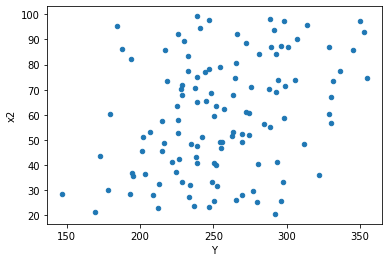

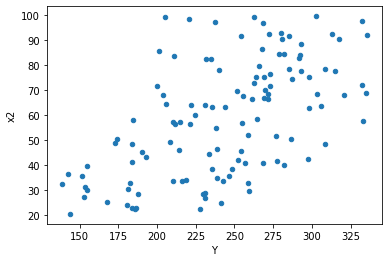

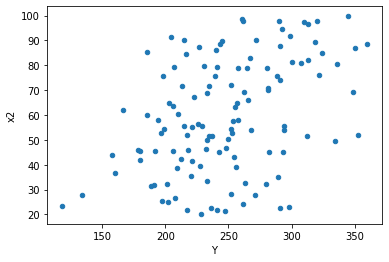

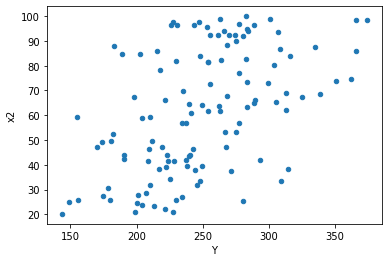

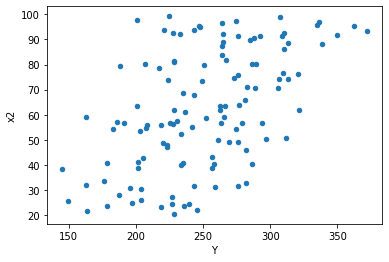

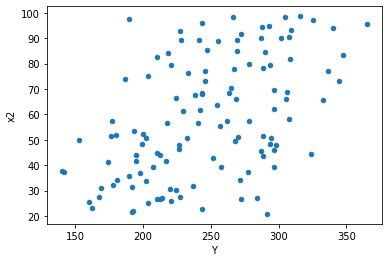

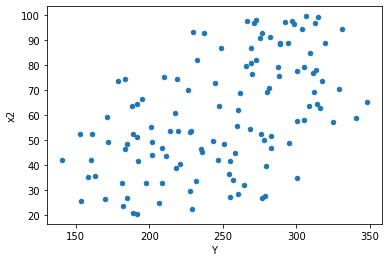

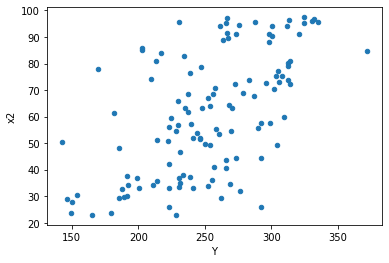

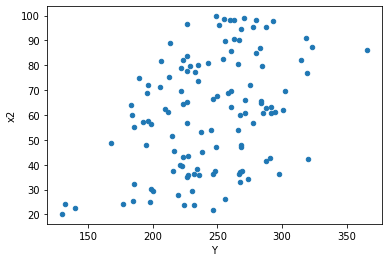

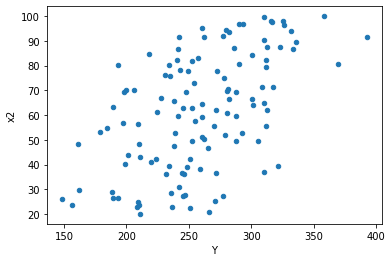

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,64.0,48.0,24.03140376694885,23.433485938262617,0.37549068385857576,0.48819762371380454,1.3001590843667337,0.3433927536814103,0.8283036231592948,0.17169637684070516,Reject001=1 : Homoscedasticity
2.0,53.0,59.0,15.016723771330005,21.704618061557056,0.2833344107798114,0.36787488239927213,1.2983770004736908,0.3286037484114903,0.8356981257942548,0.16430187420574516,Reject001=1 : Homoscedasticity
4.0,58.0,54.0,24.53288670242538,32.848382610544206,0.4229808052142307,0.6083033816767446,1.438134719538046,0.17932050686587164,0.9103397465670642,0.08966025343293582,Reject001=1 : Homoscedasticity
5.0,60.0,52.0,26.057906261910816,39.972643265559626,0.4342984376985136,0.7687046781838389,1.7699918108327788,0.03688199331782105,0.9815590033410895,0.018440996658910525,Reject001=1 : Homoscedasticity
6.0,65.0,47.0,25.971909826032157,23.975518329196678,0.3995678434774178,0.5101174112595038,1.2766728343802118,0.38072596305446904,0.8096370184727655,0.19036298152723452,Reject001=1 : Homoscedasticity
8.0,59.0,53.0,39.435757092844156,40.457642404499694,0.6684026625905789,0.7633517434811263,1.1420537143322351,0.6251850558880765,0.6874074720559618,0.31259252794403825,Reject001=1 : Homoscedasticity
11.0,30.0,82.0,9.692971208667986,46.92896887622874,0.3230990402889329,0.5723044984905944,1.7712974262591692,0.04471005553311591,0.977644972233442,0.022355027766557956,Reject001=1 : Homoscedasticity
12.0,52.0,60.0,21.690175551098896,38.26057192324648,0.4171187605980557,0.6376761987207746,1.528764128965306,0.11284620865793982,0.9435768956710301,0.05642310432896991,Reject001=1 : Homoscedasticity
13.0,58.0,54.0,20.983558486740634,27.377249499705215,0.3617854911507006,0.5069861018463929,1.4013444824275982,0.21221415361549,0.893892923192255,0.106107076807745,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,64.0,48.0,24.03140376694885,23.433485938262617,0.37549068385857576,0.48819762371380454,1.3001590843667337,0.3433927536814103,Reject001=1 : Homoscedasticity
1.0,61.0,51.0,33.838056788867014,21.185917633831313,0.5547222424404429,0.4154101496829669,0.7488615344778914,0.27848870806560233,Reject001=1 : Homoscedasticity
2.0,53.0,59.0,15.016723771330005,21.704618061557056,0.2833344107798114,0.36787488239927213,1.2983770004736908,0.3286037484114903,Reject001=1 : Homoscedasticity
3.0,61.0,51.0,32.917410569033834,26.709140135880602,0.539629681459571,0.5237086301153059,0.9704963387091636,0.9051470425041891,Reject001=1 : Homoscedasticity
4.0,58.0,54.0,24.53288670242538,32.848382610544206,0.4229808052142307,0.6083033816767446,1.438134719538046,0.17932050686587164,Reject001=1 : Homoscedasticity
5.0,60.0,52.0,26.057906261910816,39.972643265559626,0.4342984376985136,0.7687046781838389,1.7699918108327788,0.03688199331782105,Reject001=1 : Homoscedasticity
6.0,65.0,47.0,25.971909826032157,23.975518329196678,0.3995678434774178,0.5101174112595038,1.2766728343802118,0.38072596305446904,Reject001=1 : Homoscedasticity
7.0,53.0,59.0,24.27406346508058,24.869171566284358,0.4580011974543506,0.4215113824793959,0.92032812320629,0.7613126419137435,Reject001=1 : Homoscedasticity
8.0,59.0,53.0,39.435757092844156,40.457642404499694,0.6684026625905789,0.7633517434811263,1.1420537143322351,0.6251850558880765,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      982
Reject001=0 : Heteroscedasticity     18
Name: Result_test, dtype: int64